Iteration 1, loss = 4.00250272
Iteration 2, loss = 3.40553964
Iteration 3, loss = 2.83501057
Iteration 4, loss = 2.31506032
Iteration 5, loss = 1.83550853
Iteration 6, loss = 1.51090872
Iteration 7, loss = 1.32850876
Iteration 8, loss = 1.24046965
Iteration 9, loss = 1.17041371
Iteration 10, loss = 1.12110589
Iteration 11, loss = 1.07358008
Iteration 12, loss = 1.03679092
Iteration 13, loss = 1.00474070
Iteration 14, loss = 0.97298690
Iteration 15, loss = 0.94589371
Iteration 16, loss = 0.92051278
Iteration 17, loss = 0.89480893
Iteration 18, loss = 0.87292932
Iteration 19, loss = 0.84832888
Iteration 20, loss = 0.82650054
Iteration 21, loss = 0.80645614
Iteration 22, loss = 0.78835510
Iteration 23, loss = 0.76874525
Iteration 24, loss = 0.75254667
Iteration 25, loss = 0.73259700
Iteration 26, loss = 0.71952956
Iteration 27, loss = 0.70244477
Iteration 28, loss = 0.68857793
Iteration 29, loss = 0.67245257
Iteration 30, loss = 0.66097361
Iteration 31, loss = 0.64636006
Iteration 32, los

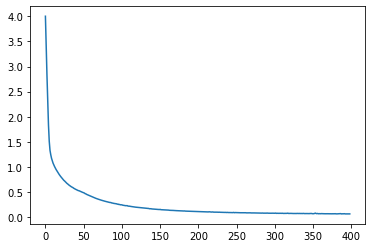

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Laden Sie das Iris-Datenset
data_train = pd.read_csv('iris.csv')

# Die 3 zu erkennen Klassifikationsklassen werden in die numerischen Werte
# 0, 1 bzw. 2 umgewandelt.
data_train.loc[data_train['species']=='Iris-setosa', 'species']=0
data_train.loc[data_train['species']=='Iris-versicolor', 'species']=1
data_train.loc[data_train['species']=='Iris-virginica', 'species']=2
data_train = data_train.apply(pd.to_numeric)

# Das eingelesene Datenset wird als Matrix dargestellt
data_train_array = data_train.values

# Zur Sicherstellung der Reproduzierbarkeit der Ergebnisse setzen wir
# random.seed auf einen festen Wert, z. B. 17
np.random.seed(17)

# Trainingsdaten: 80%
# Testdaten: 20%
# X ist ein Vektor

X_train, X_test, y_train, y_test = train_test_split(data_train_array[:, :4],
                                                    data_train_array[:, 4],
                                                    test_size=0.2)

# Variante 1
# MultilayerPerceptron
# ein Input Layer mit 4 Neuronen für die Merkmale der Pflanzen
# ein Hidden-Layer mit 10 Neuronen
# ein Output Layer, die die zu erkennenden Klassen repräsentieren
# Aktivierungsfunktion: relu
# Optimierer: adam
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=400, batch_size=10, verbose=True)

# Variante 2
# 2 Hiddenlayer mit 5 bzw. 3 Neuronen
# Aktivierungsfunktion: tahn
# Optimierer: adam
#mlp = MLPClassifier(hidden_layer_sizes=(5,3), activation='tahn', solver='adam', max_iter=350, batch_size=10, verbose=True)

# Trainieren
mlp.fit(X_train, y_train)

# Ergebnis
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))

# Das Modell mit den Testdaten evaluieren
predictions = mlp.predict(X_test)
# und die Konfusionsmatrix wird ausgegeben
print(confusion_matrix(y_test, predictions))

# Score berechnen und ausgeben
print(classification_report(y_test, predictions))

# Testen des Modells
print("Testergebnis: %5.3f" % mlp.score(X_test, y_test))

# Gewichtung ausgeben
print("Weights:", mlp.coefs_)
print("BIASES:", mlp.intercepts_)

# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width,
# petal-length, petal-width]
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))

# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values.png")
plt.show()

